# BREAST CANCER CLASSIFICATION PROJECT

***BY: ANDERSON MTAWALI AND PETER KIGANYA***

**CAPSTONE PROJECT**



---
*PROBLEM STATEMENT*

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). Here we complete by classifying these tumors using different machine learning algorithms from the Breast Cancer Wisconsin (Diagnostic) Dataset and choose the best model based on the accuracy.


---
*OBJECTIVE*

1.   Build classification models to predict whether the     cancer type is Malignant or Benign.
2.  Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.




---



📘 *Introduction*

In this project, we will:

Prepare and clean breast cancer dataset

Visualize the data distribution

Train different machine learning algorithm (logistic regression, reandom forest, xGBoost classifier and Catboost classifier)

Evaluate performance using accuracy, classification reports & confusion matrices

Compare models

🎯 *Goal: Detect malignant tumors effectively.*


---

We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:


1.   Importing the necessary libraies and the data set
2.   Data cleaning and preparation
3.   exploratory data analysis
4.   Data preprosessing
5.   Model building and evaluation
6.   Model prediction




STEP ONE: IMPORTING NECESSARRY LIBRARIES AND IMPORTING THE DATA SET



In [208]:
import pandas as pd # for data preprocessing
import numpy as np #for numerical python
import matplotlib.pyplot as plt # for visualization
import seaborn as sns #visualization
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,classification_report
from imblearn.over_sampling import SMOTE # Import SMOTE
from pandas.core.reshape.api import lreshape
import warnings
warnings.filterwarnings("ignore")

In [209]:
# Load the dataset
df = pd.read_csv("/content/data (2).csv")

STEP TWO: DATA CLEANING AND PREPARATION




The output below prints the first five rows of all the features in the dataset as shown in the table below. This is to get a glimpse of how the data look like.

In [210]:
# Display the first 5 rows
print("FIRST 5 ROWS OF THE DATA SET:")
df.head()

FIRST 5 ROWS OF THE DATA SET:


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

The output below shows the output of the information present in the data set. As we can see the  data set has 569 entries which corresponds to the rows of the data set and 33 colunms which are the variables that are in the data set. We can also observe that the dataset has no missing values except for the last column named "unnamed: 32" which shows that it was included by mistake so we will need to reomeve it since it will not be need for analysis. The data type of all the variables is also displayed where the column "id" has integer data type which are positive whole numbers then we have object data type from the "diagnosis" which is text data that and the rest of the variables had float data type which stores decimal numbers.

In [211]:
#Checking the dtypes and other information of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Here we removed the "id" and the "Unnamed: 32" columns in the data set because we do not need it in the analysis of the data. We printed the head of the data set again to confirm that the two colunms has been droped successfully.

In [212]:
#Remove the id column and the Unnamed: 32 column in the dataset
df = df.reset_index(drop=True).drop(["id", "Unnamed: 32"], axis=1)
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

Here we check the number of unique rows in the data set so as to understand it better. From the data set the diagnosis had 2 unique values which is "M" for malignant and "B" for benignin, while the rest of the data since they were discrete variables, they had several unque values.

In [213]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

diagnosis                    2
smoothness_worst           411
symmetry_mean              432
radius_mean                456
radius_worst               457
smoothness_mean            474
texture_mean               479
concave points_worst       492
symmetry_se                498
fractal_dimension_mean     499
symmetry_worst             500
concave points_se          507
texture_worst              511
perimeter_worst            514
texture_se                 519
perimeter_mean             522
area_se                    528
compactness_worst          529
perimeter_se               533
concavity_se               533
fractal_dimension_worst    535
compactness_mean           537
concavity_mean             537
area_mean                  539
concavity_worst            539
radius_se                  540
compactness_se             541
concave points_mean        542
area_worst                 544
fractal_dimension_se       545
smoothness_se              547
dtype: int64

In [214]:
#checking for duplicates values
df.duplicated().any()

np.False_

The the original data set before manipulation had 569 rows and 31. This will help us to know then percentage of the data reatained after cleaning the data set.

In [215]:

#creating a data frame of the original data set that will be used later for comparison
df_original = df.copy()

#checking the number of rows and columns
df_original.shape

(569, 31)

Below are the descriptive statistics of the variables in the data set. From the total count, mean, standard deviation, minimum value in each variable and quartiles, that is the 25%, 50% and the 75% and las is the maximum values in the data set which shows the largest outcome in every feature.

In [216]:
#Checking the descriptive stats of all the columns

display(df.describe())

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]


STEP 3 EXPLORATORY DATA ANALYSIS

Here we expolre the data using some graphs like pie char, histogram, box plot and scatter plots so as to see how the data like like visual and the relationship between some selected features.


---

The pie chart below shows the distribution of the target variable and we can observe that 62.7% of the data fall under class 0 which is benign while 37.3% of the data fall under class 1 malignant which is the cancerous tumor.This shows that there was class imbalance but we will deal with it in the next steps.

Values in 'diagnosis' column after mapping (1=Malignant, 0=Benign):
diagnosis
0    357
1    212
Name: count, dtype: int64


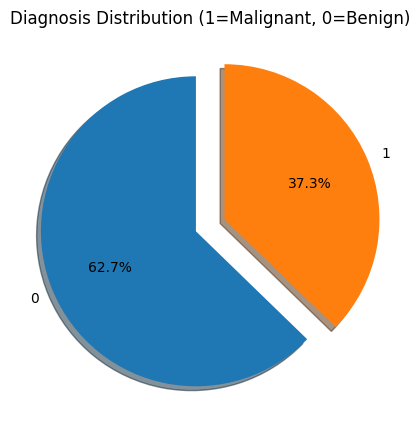

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [217]:
import matplotlib.pyplot as plt
import numpy as np

# map 'M' to 1 and 'B' to 0 in the 'diagnosis' column
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

print("Values in 'diagnosis' column after mapping (1=Malignant, 0=Benign):")
print(df['diagnosis'].value_counts())

# Prepare explode based on the number of unique values
num_classes = len(df['diagnosis'].value_counts())
if num_classes > 1:
    explode = [0.1] * num_classes
else:
    explode = [0.1]

# Plot the pie chart with explode
plt.figure(figsize=(5,6))
df['diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True, explode=explode)
plt.title('Diagnosis Distribution (1=Malignant, 0=Benign)')
plt.ylabel('')
plt.show()

display(df.head()) # Display the dataframe to show the updated 'diagnosis' column

                                     Features Distribution                                      


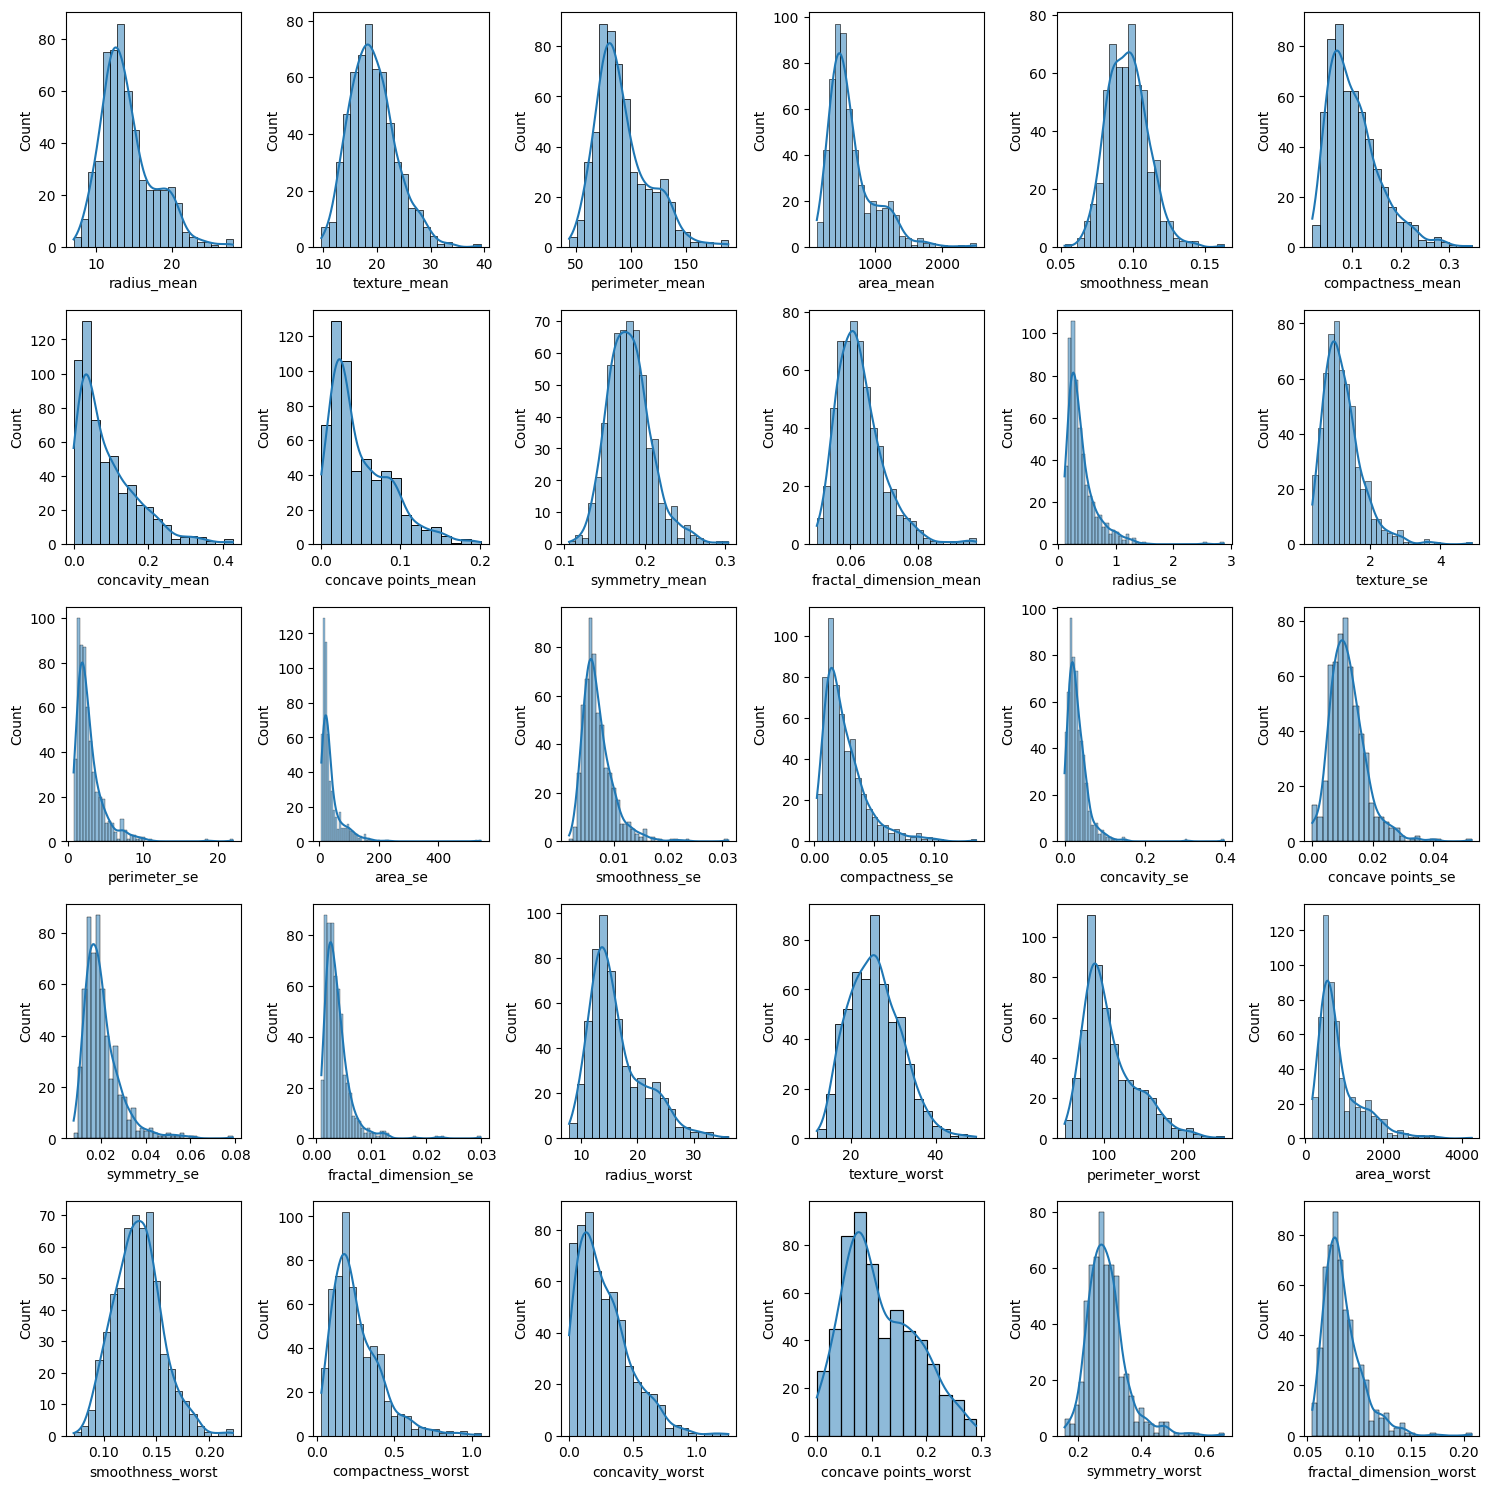

In [218]:
#Understanding the feature set
import math
import matplotlib.pyplot as plt
import seaborn as sns

print('\033[1mFeatures Distribution'.center(100))

n=6
features = df.columns # Define features here
cf = ['diagnosis'] # Define cf to exclude the target variable

nf = [i for i in features if i not in cf]

plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/n),n,c+1)
    sns.histplot(df[nf[c]], kde=True) # Changed distplot to histplot
plt.tight_layout()
plt.show()



**Inference:** The data is somewhat normally distributed based on the distribution of the histograms.

                                       Features Boxplots                                        


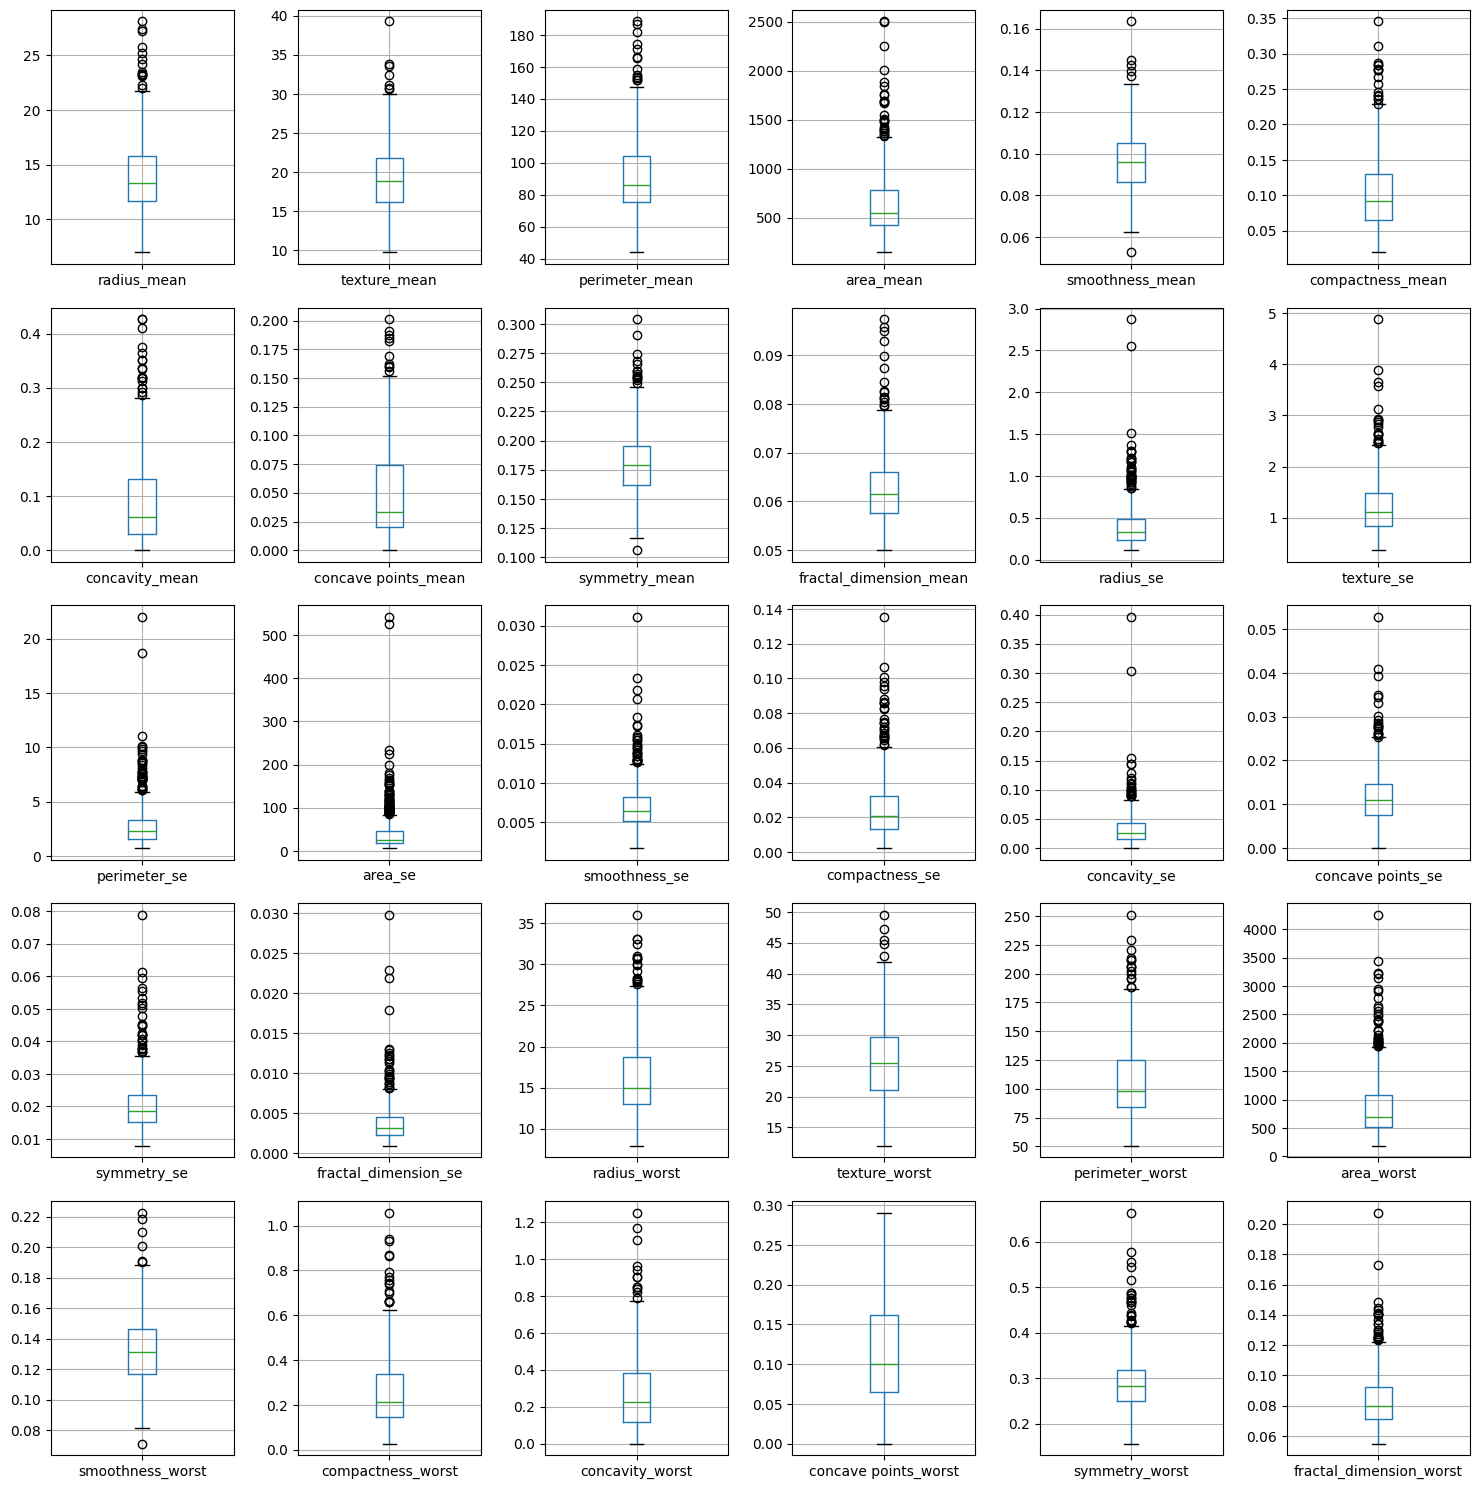

In [219]:
#checking for outliers using boxplots
print('\033[1mFeatures Boxplots'.center(100))

n=6
features = df.columns # Define features here
cf = ['diagnosis'] # Define cf to exclude the target variable

nf = [i for i in features if i not in cf]
plt.figure(figsize=[15,3*math.ceil(len(nf)/n)])
for c in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/n),n,c+1)
    df.boxplot(nf[c])
plt.tight_layout()
plt.show()

There are many outliers present in the dataset. We shall fix these outliers by removing them

In [220]:
#Removal of outlier:

for i in [i for i in df.columns]:
    if df[i].nunique()>=12:
        Q1 = df[i].quantile(0.15)
        Q3 = df[i].quantile(0.85)
        IQR = Q3 - Q1
        df = df[df[i] <= (Q3+(1.5*IQR))]
        df = df[df[i] >= (Q1-(1.5*IQR))]
df = df.reset_index(drop=True)
display(df.head())

print('\033[1mInference:\033[0m After removal of outliers, The dataset now has {} samples.'.format(df.shape[0]))

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        20.57         17.77          132.90     1326.0   
1          1        19.69         21.25          130.00     1203.0   
2          1        20.29         14.34          135.10     1297.0   
3          1        12.45         15.70           82.57      477.1   
4          1        18.25         19.98          119.60     1040.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.08474           0.07864          0.0869              0.07017   
1          0.10960           0.15990          0.1974              0.12790   
2          0.10030           0.13280          0.1980              0.10430   
3          0.12780           0.17000          0.1578              0.08089   
4          0.09463           0.10900          0.1127              0.07400   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.1812  ...         24.99          23.41            158.8   
1         0.2069  ...         23.57          25.53            152.5   
2         0.1809  ...         22.54          16.67            152.2   
3         0.2087  ...         15.47          23.75            103.4   
4         0.1794  ...         22.88          27.66            153.2   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      1956.0            0.1238             0.1866           0.2416   
1      1709.0            0.1444             0.4245           0.4504   
2      1575.0            0.1374             0.2050           0.4000   
3       741.6            0.1791             0.5249           0.5355   
4      1606.0            0.1442             0.2576           0.3784   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.1860          0.2750                  0.08902  
1                0.2430          0.3613                  0.08758  
2                0.1625          0.2364                  0.07678  
3                0.1741          0.3985                  0.12440  
4                0.1932          0.3063                  0.08368  

[5 rows x 31 columns]

Inference: After removal of outliers, The dataset now has 502 samples.


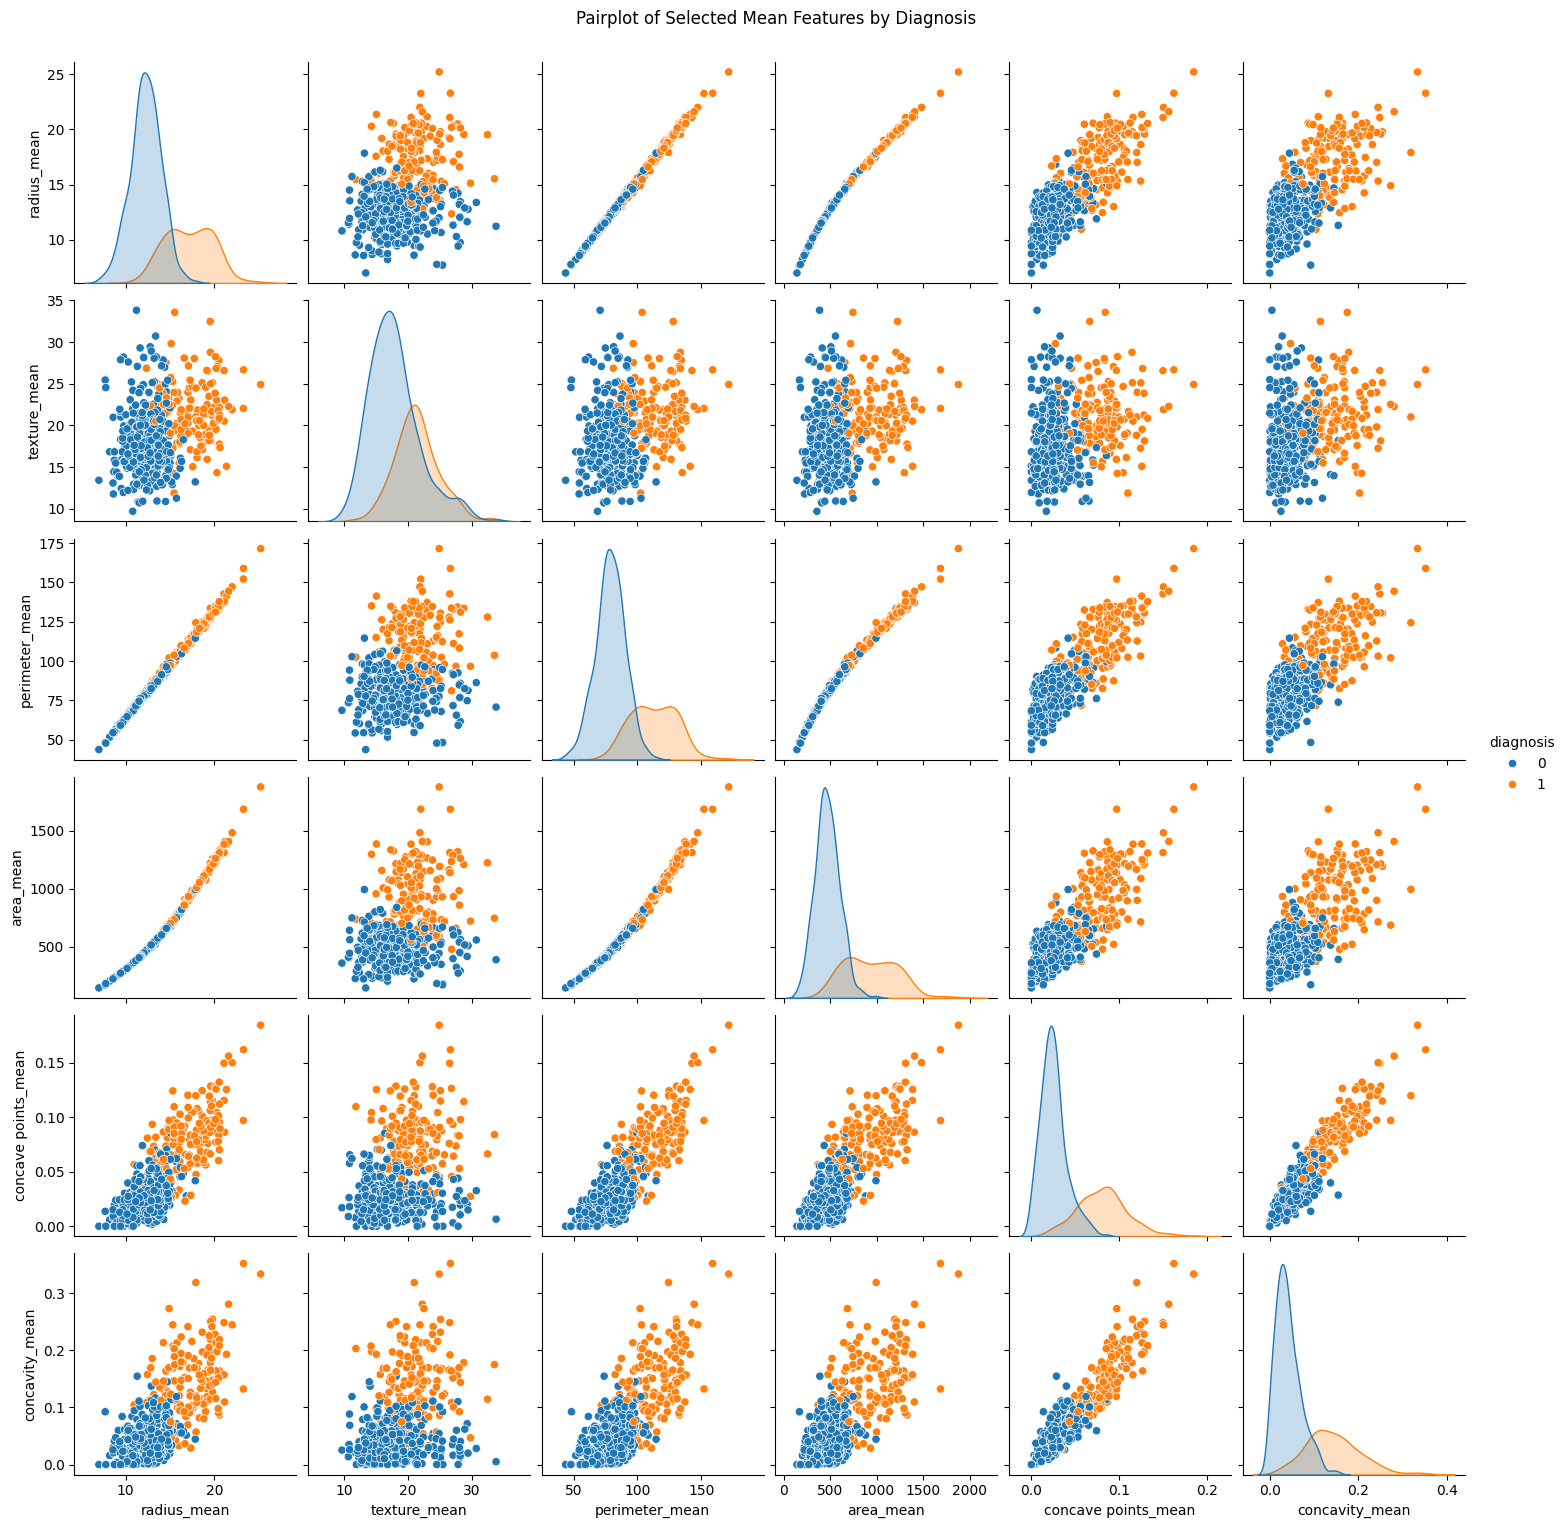

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select some 'mean' variables to plot
mean_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'concavity_mean']

# Combine with the diagnosis column for the pairplot
plot_df = df[mean_features + ['diagnosis']]

# Generate the pairplot, using 'diagnosis' as hue to distinguish classes
sns.pairplot(plot_df, hue='diagnosis', diag_kind='kde')
plt.suptitle('Pairplot of Selected Mean Features by Diagnosis', y=1.02) # Adjust title position
plt.show()

The above chart contains pairplot of some selected features that has mean in the variable naming.This helps to understand the relationships between the predictor variables. As we can observe that perimeter_mean and radius mean, Perimeter_mean and area_mean and area_mean together with radius_mean are highly correlated. Generally most of the variables are correlated with one another and for the malignant the values are more than the benign. We will remove the highly correlated values in the next steps so as to reduce redundance in the predictor variables.

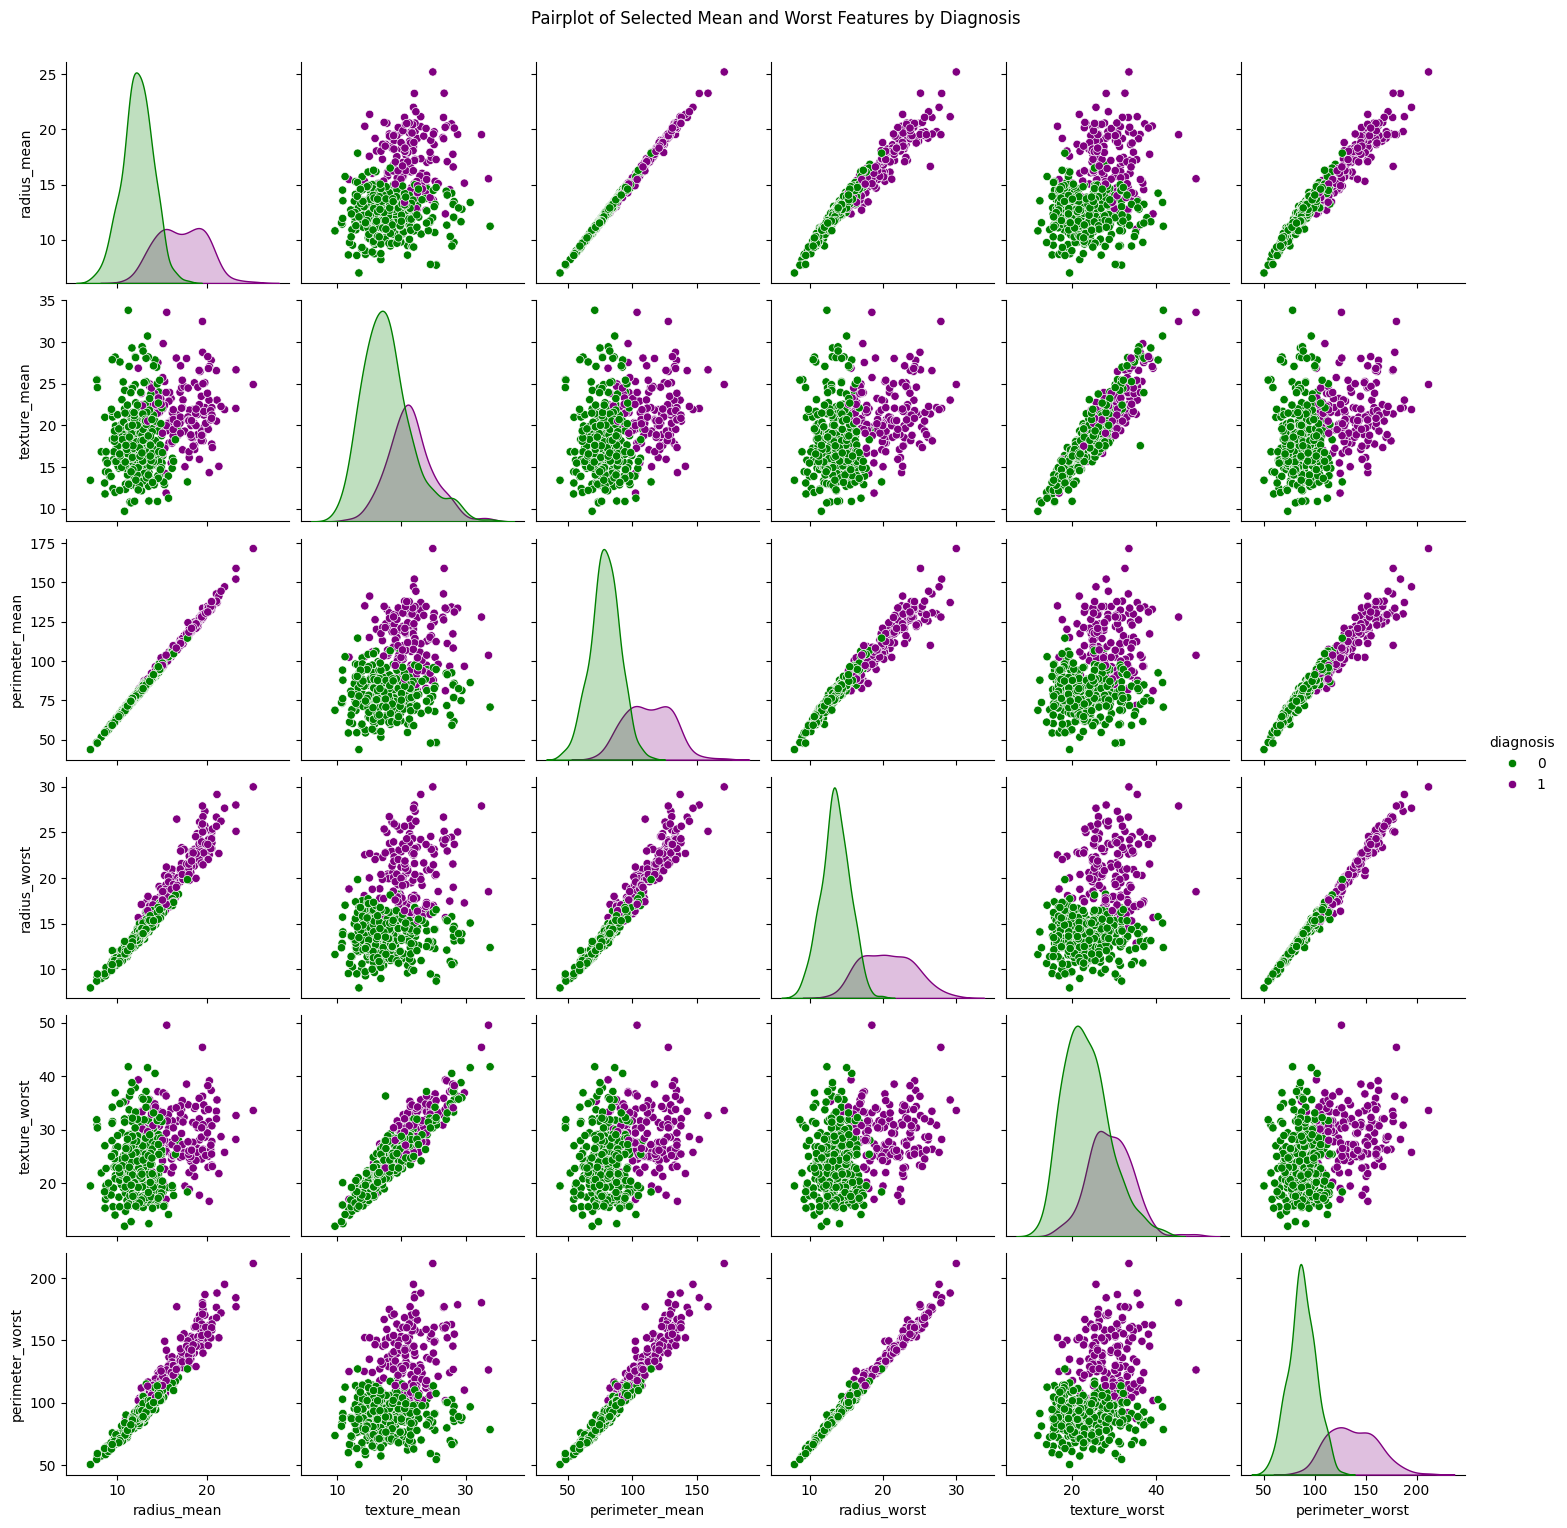

In [222]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select 3 'mean' variables
selected_mean_features = ['radius_mean', 'texture_mean', 'perimeter_mean']

# Select 3 'worst' variables
selected_worst_features = ['radius_worst', 'texture_worst', 'perimeter_worst']

# Combine with the diagnosis column for the pairplot
plot_df_combined = df[selected_mean_features + selected_worst_features + ['diagnosis']]

# Generate the pairplot, using 'diagnosis' as hue to distinguish classes
sns.pairplot(plot_df_combined, hue='diagnosis', diag_kind='kde', palette=['green', 'purple'])
plt.suptitle('Pairplot of Selected Mean and Worst Features by Diagnosis', y=1.02) # Adjust title position
plt.show()

Here we also have another pairplot for 6 varibles that has mean and worst in the variable naming 'radius_mean', 'texture_mean', 'perimeter_mean', 'radius_worst', 'texture_worst', 'perimeter_worst'. The observation is that most of the variables has positive correlation.

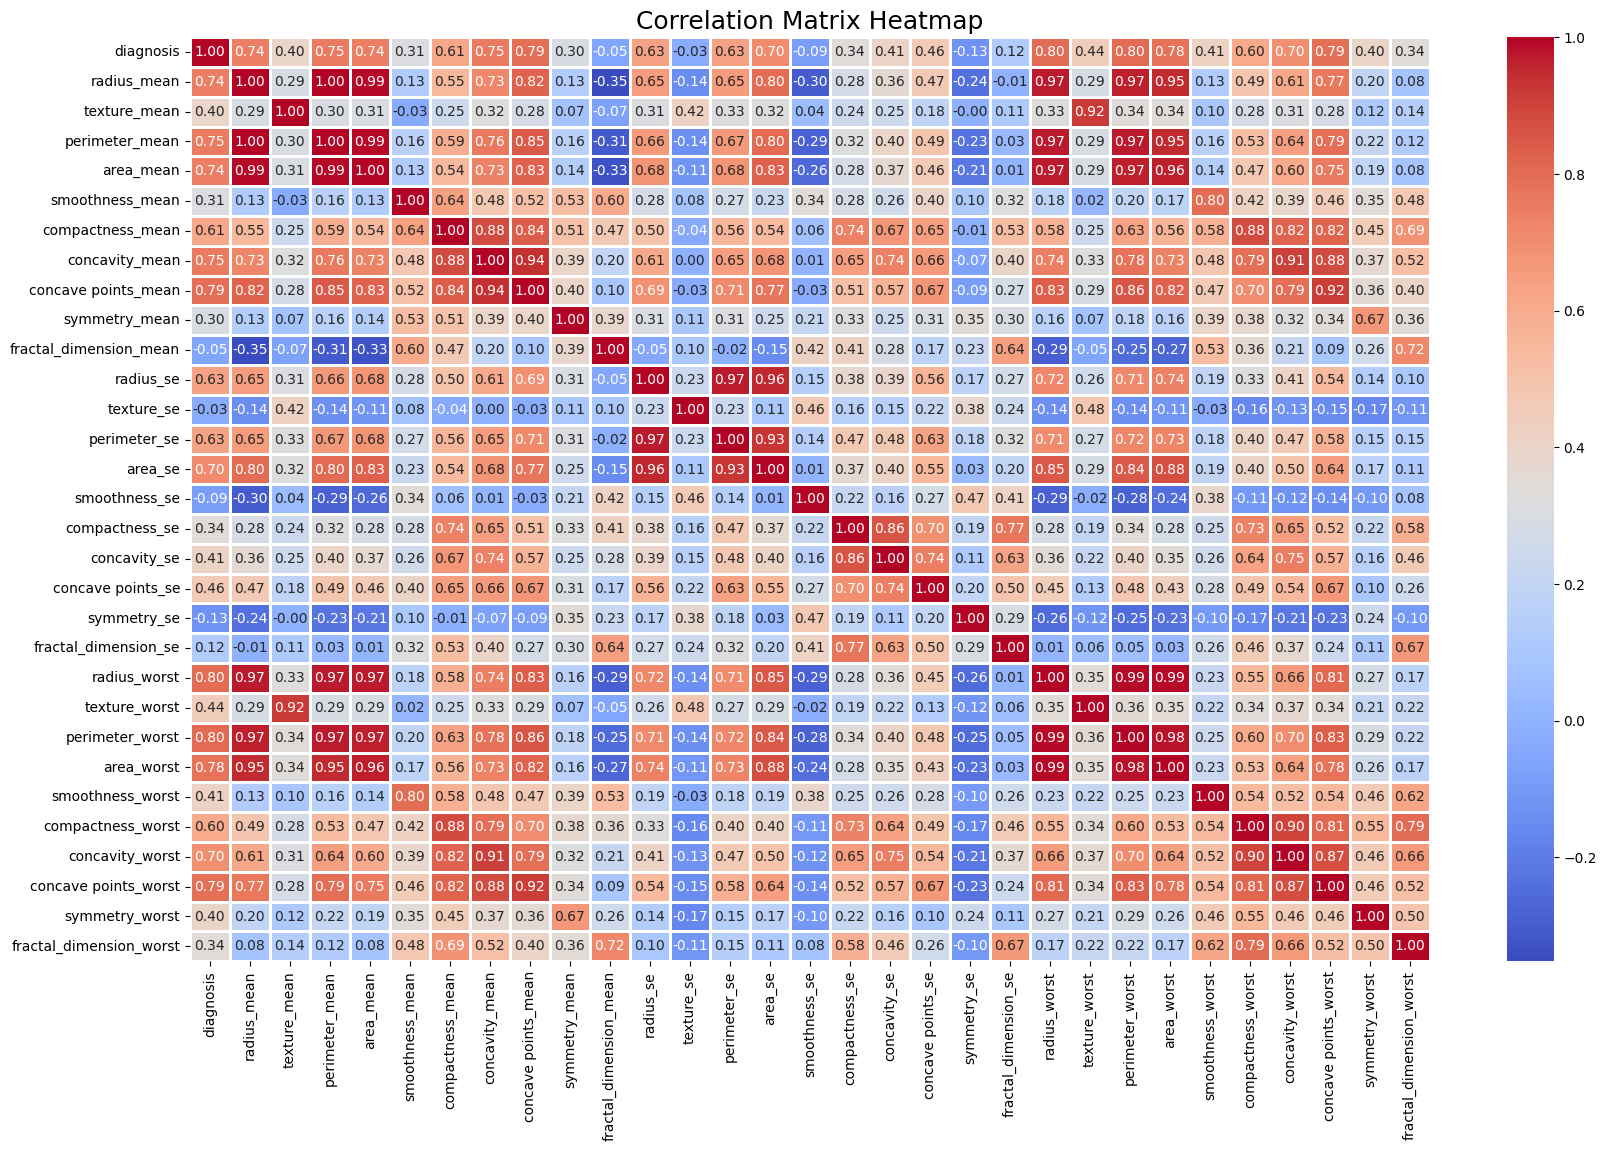

In [223]:
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 12))
plt.title("Correlation Matrix Heatmap", fontsize=18)

# Draw the heatmap (NO MASK APPLIED)
sns.heatmap(corr, linewidths=1, annot=True, fmt=".2f", cmap="coolwarm")

# Show the plot
plt.show()


**Inference:** Correlation plt between the variables convey lot of information about the realationship betweem them. There seems to be strong multicollinearity in the dataset. We will remove the variables that are highly correlated to avoid rundandancy and select the features that are most relevant for analysis.

In [224]:
corr_matrix = numeric_df.corr().abs()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

df = df.drop(to_drop, axis=1)

print(f"The reduced dataframe has {df.shape[1]} columns.")

The reduced dataframe has 23 columns.


STEP 4 DATA PREPROSESSING

Here we prepare the data for modeling.

In [225]:
#Fixing the imbalance using SMOTE Technique

df1 = df.copy()

print('Original class distribution:')
print(df1['diagnosis'].value_counts())

xf = df1.columns
X = df1.drop(['diagnosis'],axis=1)
Y = df1['diagnosis']

smote = SMOTE(random_state=42)
X, Y = smote.fit_resample(X, Y)

df1 = pd.DataFrame(X, columns=xf)
df1['diagnosis'] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
diagnosis
0    337
1    165
Name: count, dtype: int64

Class distribution after applying SMOTE Technique:
diagnosis
1    337
0    337
Name: count, dtype: int64


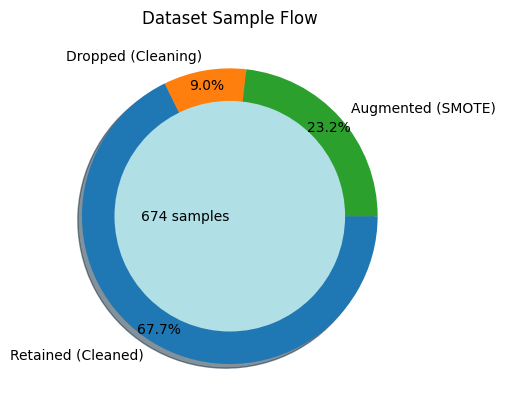


Inference:The final dataset after cleanup has 674 samples & 23 columns.


In [226]:
#Final Dataset size after performing Preprocessing

rows_after_cleaning_before_smote = 502

#copying back the smote data df1 into the df
df = df1.copy()

# Calculate the components for the pie chart
retained_after_cleaning = rows_after_cleaning_before_smote
dropped_during_cleaning = df_original.shape[0] - rows_after_cleaning_before_smote
augmented_by_smote = df.shape[0] - rows_after_cleaning_before_smote

plt.title('Dataset Sample Flow')
plt.pie(
    [retained_after_cleaning, dropped_during_cleaning, augmented_by_smote],
    radius=1,
    shadow=True,
    labels=['Retained (Cleaned)', 'Dropped (Cleaning)', 'Augmented (SMOTE)'],
    counterclock=False,
    autopct='%1.1f%%',
    pctdistance=0.9
)

# Re-added the second pie chart for overall retained percentage
plt.pie([df.shape[0]], labels=[f'{df.shape[0]} samples'], labeldistance=-0, radius=0.78, shadow=True, colors=['powderblue'])
plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} columns.'.format(df.shape[0], df.shape[1]))

In [227]:
X = df.drop(['diagnosis'],axis=1)
Y = df['diagnosis']
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (674, 22) (674,) 
Training set  --->  (539, 22) (539,) 
Testing set   --->  (135, 22)  (135,)


In [228]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


texture_mean  smoothness_mean  compactness_mean  concave points_mean  \
count  5.390000e+02     5.390000e+02      5.390000e+02         5.390000e+02   
mean  -7.382262e-16     3.147348e-16     -1.417131e-16         6.591306e-18   
std    1.000929e+00     1.000929e+00      1.000929e+00         1.000929e+00   
min   -2.291819e+00    -3.557389e+00     -1.997145e+00        -1.506710e+00   
25%   -7.076223e-01    -7.146167e-01     -7.788537e-01        -8.416346e-01   
50%   -2.745504e-02     7.070915e-02     -5.205094e-02        -2.076045e-01   
75%    6.137649e-01     6.528952e-01      6.227242e-01         8.256407e-01   
max    3.610800e+00     3.285842e+00      3.723775e+00         3.700437e+00   

       symmetry_mean  fractal_dimension_mean    texture_se       area_se  \
count   5.390000e+02            5.390000e+02  5.390000e+02  5.390000e+02   
mean    7.110371e-16            1.029068e-15 -3.493392e-16 -2.274000e-16   
std     1.000929e+00            1.000929e+00  1.000929e+00  1.000929e+00   
min    -2.771482e+00           -2.199533e+00 -1.789526e+00 -1.156410e+00   
25%    -7.314358e-01           -7.580818e-01 -7.409017e-01 -7.476334e-01   
50%     2.455120e-02           -1.053974e-01 -2.018621e-01 -3.987360e-01   
75%     6.289725e-01            6.244919e-01  5.830685e-01  4.845123e-01   
max     3.336846e+00            3.379069e+00  3.959931e+00  3.228289e+00   

       smoothness_se  compactness_se  ...   symmetry_se  fractal_dimension_se  \
count   5.390000e+02    5.390000e+02  ...  5.390000e+02          5.390000e+02   
mean   -1.977392e-16    5.602610e-17  ...  3.954783e-17         -6.920871e-17   
std     1.000929e+00    1.000929e+00  ...  1.000929e+00          1.000929e+00   
min    -1.798396e+00   -1.779735e+00  ... -1.620872e+00         -1.691604e+00   
25%    -7.170687e-01   -7.722172e-01  ... -6.888772e-01         -7.282506e-01   
50%    -1.968852e-01   -1.471201e-01  ... -2.045867e-01         -1.240469e-01   
75%     5.393119e-01    5.599111e-01  ...  4.299285e-01          5.023676e-01   
max     4.194390e+00    3.694893e+00  ...  4.442253e+00          4.116336e+00   

       texture_worst    area_worst  smoothness_worst  compactness_worst  \
count   5.390000e+02  5.390000e+02      5.390000e+02       5.390000e+02   
mean    1.087565e-16  3.740566e-16      1.128761e-16      -2.834261e-16   
std     1.000929e+00  1.000929e+00      1.000929e+00       1.000929e+00   
min    -2.403837e+00 -1.494166e+00     -2.518322e+00      -1.743979e+00   
25%    -7.526034e-01 -7.999365e-01     -6.553216e-01      -7.555004e-01   
50%     6.892705e-03 -3.355790e-01      5.125263e-02      -1.221024e-01   
75%     7.243932e-01  6.529368e-01      6.165120e-01       6.687435e-01   
max     4.149274e+00  3.147435e+00      2.646735e+00       3.591070e+00   

       concavity_worst  concave points_worst  symmetry_worst  \
count     5.390000e+02          5.390000e+02    5.390000e+02   
mean     -4.613914e-17          3.262696e-16   -6.624262e-16   
std       1.000929e+00          1.000929e+00    1.000929e+00   
min      -1.586645e+00         -2.028230e+00   -2.540785e+00   
25%      -8.310522e-01         -8.212462e-01   -7.021144e-01   
50%      -7.814693e-02          7.093291e-04   -9.131605e-02   
75%       6.411630e-01          8.141218e-01    5.895567e-01   
max       3.270010e+00          2.621625e+00    3.759642e+00   

       fractal_dimension_worst  
count             5.390000e+02  
mean              6.480077e-16  
std               1.000929e+00  
min              -1.818608e+00  
25%              -7.008946e-01  
50%              -1.487727e-01  
75%               5.609841e-01  
max               3.425237e+00  

[8 rows x 22 columns]


                                Standardardization on Testing set                                


texture_mean  smoothness_mean  compactness_mean  concave points_mean  \
count    135.000000       135.000000        135.000000           135.000000   
mean       0.045673         0.000549         -0.073126             0.005945   
std        1.141822         0.996709          1.040417             0.986833   
min       -2.552837        -2.612769         -1.832315            -1.506710   
25%       -0.759309        -0.640894         -0.878403            -0.920800   
50%       -0.049348         0.017747         -0.138865             0.063619   
75%        0.706008         0.628591          0.602221             0.670531   
max        3.675408         2.637732          4.110386             2.715453   

       symmetry_mean  fractal_dimension_mean  texture_se     area_se  \
count     135.000000              135.000000  135.000000  135.000000   
mean       -0.142359               -0.080221   -0.074668    0.025504   
std         1.154774                1.039059    0.932008    0.952607   
min        -2.935955               -1.860698   -1.785270   -1.104341   
25%        -0.867259               -0.864787   -0.677736   -0.717659   
50%        -0.194746               -0.207229   -0.264580   -0.274387   
75%         0.468612                0.430647    0.419024    0.506752   
max         4.264288                2.365809    3.850175    2.800089   

       smoothness_se  compactness_se  ...  symmetry_se  fractal_dimension_se  \
count     135.000000      135.000000  ...   135.000000            135.000000   
mean        0.073219       -0.103716  ...    -0.051615             -0.093696   
std         1.127626        0.991412  ...     0.977484              0.952067   
min        -1.721767       -1.659061  ...    -1.492430             -1.729580   
25%        -0.652539       -0.893884  ...    -0.789504             -0.833862   
50%        -0.225923       -0.163469  ...    -0.246363             -0.293361   
75%         0.476665        0.386101  ...     0.385461              0.522704   
max         3.611827        3.873885  ...     3.901804              2.863963   

       texture_worst  area_worst  smoothness_worst  compactness_worst  \
count     135.000000  135.000000        135.000000         135.000000   
mean        0.021114    0.068262          0.038649          -0.028454   
std         1.134225    1.026968          0.979735           1.116826   
min        -2.555737   -1.373464         -2.310119          -1.676258   
25%        -0.812470   -0.698839         -0.532849          -0.959475   
50%         0.008680   -0.305403          0.092779          -0.205843   
75%         0.792262    0.855532          0.639462           0.719403   
max         3.411222    3.175933          2.149363           3.734835   

       concavity_worst  concave points_worst  symmetry_worst  \
count       135.000000            135.000000      135.000000   
mean         -0.090318             -0.005944       -0.088351   
std           0.962226              1.041034        1.110803   
min          -1.586645             -2.028230       -2.392269   
25%          -0.932927             -0.934452       -0.886003   
50%          -0.109250              0.172626       -0.218914   
75%           0.598256              0.842451        0.608383   
max           2.190514              2.680012        3.640411   

       fractal_dimension_worst  
count               135.000000  
mean                 -0.053877  
std                   1.073447  
min                  -1.966612  
25%                  -0.792862  
50%                  -0.263887  
75%                   0.519256  
max                   3.438941  

[8 rows x 22 columns]

Here we perform feature scaling of the features to be in a standard way so as to avoid the model giving importance to featuers with large values. We have used standardization method where the data is distributed with mean of 0 and standard deviation of 1.

STEP 5 MODEL BUILDING AND EVALUATION

Building a ligistic model for the classification

In [229]:
# Initialize and train the Logistic Regression model

Lr_model = LogisticRegression(random_state=42)
Lr_model.fit(Train_X_std, Train_Y)

# Make predictions on the test set
Lr_predictions = Lr_model.predict(Test_X_std)

# Evaluate the model
print('\033[1mLogistic Regression Model Evaluation:\033[0m')
print(f"Accuracy: {accuracy_score(Test_Y, Lr_predictions):.4f}")
print("\nClassification Report:")
print(classification_report(Test_Y, Lr_predictions))


Logistic Regression Model Evaluation:
Accuracy: 0.9852

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.99      0.99      0.99        68

    accuracy                           0.99       135
   macro avg       0.99      0.99      0.99       135
weighted avg       0.99      0.99      0.99       135



Building a randomForest model

In [230]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(Train_X_std, Train_Y)

# Make predictions on the test set
rf_predictions = rf_model.predict(Test_X_std)

# Evaluate the model
print('\033[1mRandom Forest Classifier Model Evaluation:\033[0m')
print(f"Accuracy: {accuracy_score(Test_Y, rf_predictions):.4f}")
print("\nClassification Report:")
print(classification_report(Test_Y, rf_predictions))

print("Random Forest Classifier model trained and evaluated successfully!")

Random Forest Classifier Model Evaluation:
Accuracy: 0.9556

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       0.94      0.97      0.96        68

    accuracy                           0.96       135
   macro avg       0.96      0.96      0.96       135
weighted avg       0.96      0.96      0.96       135

Random Forest Classifier model trained and evaluated successfully!


Building XGBoost model

In [231]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(Train_X_std, Train_Y)

# Make predictions on the test set
xgb_predictions = xgb_model.predict(Test_X_std)

# Evaluate the model
print('\033[1mXGBoost Classifier Model Evaluation:\033[0m')
print(f"Accuracy: {accuracy_score(Test_Y, xgb_predictions):.4f}")
print("\nClassification Report:")
print(classification_report(Test_Y, xgb_predictions))


XGBoost Classifier Model Evaluation:
Accuracy: 0.9704

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        67
           1       0.96      0.99      0.97        68

    accuracy                           0.97       135
   macro avg       0.97      0.97      0.97       135
weighted avg       0.97      0.97      0.97       135



Building a catBoost model

In [232]:
pip install catboost

In [233]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

cat_model = CatBoostClassifier(iterations=100,
                               learning_rate=0.1,
                               depth=6,
                               loss_function='Logloss',
                               eval_metric='Accuracy',
                               random_seed=42,
                               verbose=0,
                              )
cat_model.fit(Train_X_std, Train_Y, verbose=False)

# Make predictions on the test set
cat_predictions = cat_model.predict(Test_X_std)

# Evaluate the model
print('\033[1mCatBoost Classifier Model Evaluation:\033[0m')
print(f"Accuracy: {accuracy_score(Test_Y, cat_predictions):.4f}")
print("\nClassification Report:")
print(classification_report(Test_Y, cat_predictions))


CatBoost Classifier Model Evaluation:
Accuracy: 0.9704

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.97      0.97      0.97        68

    accuracy                           0.97       135
   macro avg       0.97      0.97      0.97       135
weighted avg       0.97      0.97      0.97       135



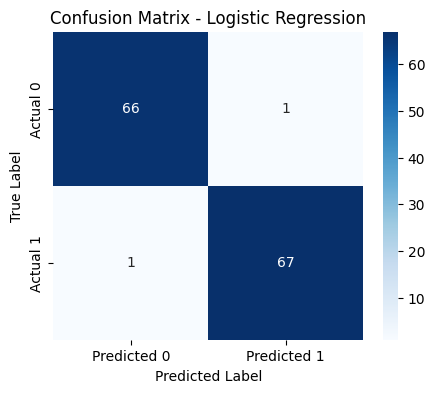

In [234]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Confusion Matrix for Logistic Regression ---
cm_Lr = confusion_matrix(Test_Y, Lr_predictions)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_Lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

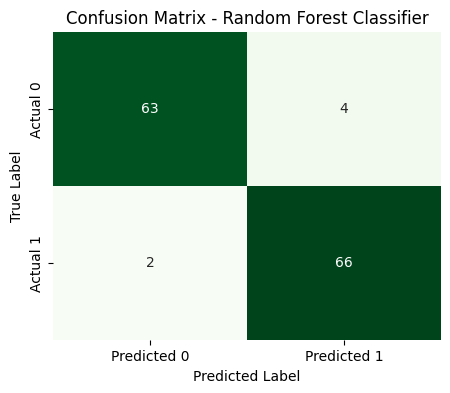

In [235]:
# --- Confusion Matrix for Random Forest ---
cm_rf = confusion_matrix(Test_Y, rf_predictions)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

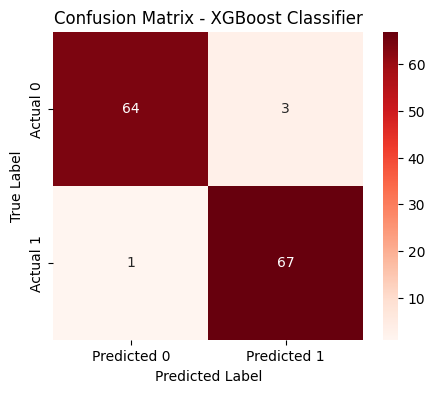

In [236]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Confusion Matrix for XGBoost ---
cm_xgb = confusion_matrix(Test_Y, xgb_predictions)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - XGBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

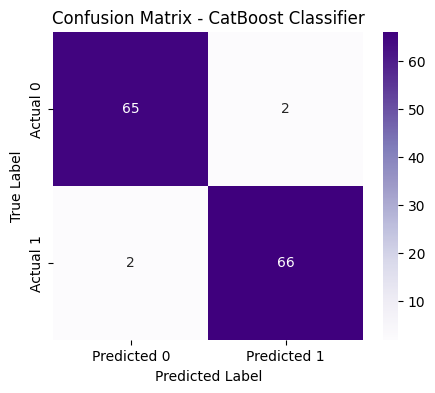

In [237]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Confusion Matrix for CatBoost ---
cm_cat = confusion_matrix(Test_Y, cat_predictions)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - CatBoost Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

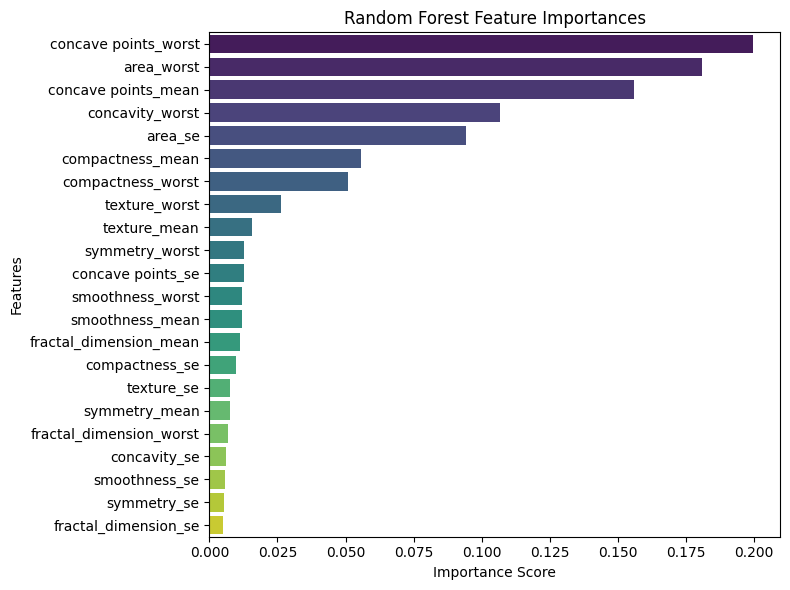

Top 10 features by importance:
|                      | 0         |
|:---------------------|:----------|
| concave points_worst | 0.199577  |
| area_worst           | 0.180885  |
| concave points_mean  | 0.155891  |
| concavity_worst      | 0.106744  |
| area_se              | 0.0943735 |
| compactness_mean     | 0.0555683 |
| compactness_worst    | 0.0507488 |
| texture_worst        | 0.0262496 |
| texture_mean         | 0.0156621 |
| symmetry_worst       | 0.0128772 |


In [238]:
# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a pandas Series for better visualization and sorting
features_df = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

# Plotting the feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x=features_df.values, y=features_df.index, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("Top 10 features by importance:")
print(features_df.head(10).to_markdown(numalign="left", stralign="left"))

Here we are able to see that the variable concave points_worst has contributed the largest percentage in classification of the breast cancer while fractal dimension_se has contributed the least in the model.

STEP 6 MODEL PREDICTION

Here we selected the best model based on the accuracy score of every model.

In [239]:
import pandas as pd
from sklearn.metrics import accuracy_score
#Accuracy for each model
Lr_accuracy = accuracy_score(Test_Y, Lr_predictions)
rf_accuracy = accuracy_score(Test_Y, rf_predictions)
xgb_accuracy = accuracy_score(Test_Y, xgb_predictions)
cat_accuracy = accuracy_score(Test_Y, cat_predictions)

# Create a dictionary to hold model names and their accuracies
model_accuracies = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'CatBoost'],
    'Accuracy': [Lr_accuracy, rf_accuracy, xgb_accuracy, cat_accuracy]
}

# Create a DataFrame from the dictionary
accuracy_df = pd.DataFrame(model_accuracies)

# Sort by accuracy in descending order for better comparison
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

print("Model Accuracy Comparison:")
display(accuracy_df)

Model Accuracy Comparison:


Model  Accuracy
0  Logistic Regression  0.985185
1              XGBoost  0.970370
2             CatBoost  0.970370
3        Random Forest  0.955556

In [242]:
# Making predictions with the Logistic Regression model
xgb_predictions_sample = xgb_model.predict(Test_X_std.head(10))

print("Sample Predictions using XGBoost Model:")
print(xgb_predictions_sample)
print("\nCorresponding Actual Values:")
print(Test_Y.head(10).values)

Sample Predictions using XGBoost Model:
[0 0 1 1 0 1 1 0 0 0]

Corresponding Actual Values:
[0 1 1 1 0 1 1 0 0 0]


**Project Outcomes & Conclusions**

Here are some of the key outcomes of the project:
The Dataset was quiet small totalling around 569 samples &

1.   after preprocessing 9% of the data samples were dropped.
The samples were slightly imbalanced after processing, hence SMOTE Technique was applied on the data to balance the classes, adding 23.2% more samples to the dataset.
2.  Visualising the distribution of data & their relationships, helped us to get some insights on the relationship between the feature-set.
3.  Feature Selection/Eliminination was carried out and appropriate features were shortlisted.
4.  Testing multiple algorithms with fine-tuning hyperparamters gave us some understanding on the model performance for various algorithms on this specific dataset.
5.  The logistic regression performed well on the data set followed by XGBoost classifier.
6.  We choose XGBoost model for the predictions over regression model since XGBoost can capture complex patterns but regression model can cost us with missclassification and yet the field of study is sensitive despite it having high accuracy score.



---

*END THANK YOU* ✌